In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import holidays
import os
import math

In [2]:
file_name = "E:/S20_Capstone/airfare_lax_2018_2019.csv" 
airfare_data = pd.read_csv(file_name)

In [3]:
airfare_data.shape

(8173767, 13)

In [4]:
airfare_data.head()

,COLLECT_DATE,QL2_QTS,FROM_AIRPORT,TO_AIRPORT,SITE,CXR,DDATE,DSTP,CURRENCY,DFLIGHT,DTIME,DROUTE,FARE
0,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2412,06:53,06:53 - MCO :: 09:30 - LAX,555.0
1,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2412,06:53,06:53 - MCO :: 09:30 - LAX,274.0
2,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2126,19:48,19:48 - MCO :: 22:30 - LAX,464.0
3,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2126,19:48,19:48 - MCO :: 22:30 - LAX,555.0
4,2018-01-01 00:04:00,5844,IAD,LAX,UA,UA,2018-01-05,0,USD,1038,06:20,06:20 - IAD :: 09:20 - LAX,865.0


In [5]:
airfare_data["DDATE"] = airfare_data["DDATE"] .astype('datetime64[ns]')
airfare_data["COLLECT_DATE"] = airfare_data["COLLECT_DATE"] .astype('datetime64[ns]')

In [6]:
airfare_data["TIME_BEFORE_FLIGHT"] = ((airfare_data["DDATE"] - airfare_data["COLLECT_DATE"])/ np.timedelta64(1, 'D')).astype(int)
airfare_data.head()

,COLLECT_DATE,QL2_QTS,FROM_AIRPORT,TO_AIRPORT,SITE,CXR,DDATE,DSTP,CURRENCY,DFLIGHT,DTIME,DROUTE,FARE,TIME_BEFORE_FLIGHT
0,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2412,06:53,06:53 - MCO :: 09:30 - LAX,555.0,3
1,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2412,06:53,06:53 - MCO :: 09:30 - LAX,274.0,3
2,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2126,19:48,19:48 - MCO :: 22:30 - LAX,464.0,3
3,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2126,19:48,19:48 - MCO :: 22:30 - LAX,555.0,3
4,2018-01-01 00:04:00,5844,IAD,LAX,UA,UA,2018-01-05,0,USD,1038,06:20,06:20 - IAD :: 09:20 - LAX,865.0,3


In [7]:
airport_distance_data = pd.read_csv(os.getcwd()+"\\"+"distance_between_airports.csv", delimiter=",")

In [8]:
airfare_data = pd.merge(airfare_data, airport_distance_data, how = "left", left_on = ["FROM_AIRPORT", "TO_AIRPORT"]
                      , right_on = ["AIRPORT_FROM", "AIRPORT_TO"])

# Renaming Miles column
airfare_data.rename(columns = {" MILES " : "MILES"} , inplace = True)

# Removing comma and extra space from each entry in miles
airfare_data["MILES"] = airfare_data["MILES"].apply(lambda x : x.replace(",", "").strip())

# Converting to numeric
airfare_data["MILES"] = pd.to_numeric(airfare_data["MILES"])

# Adding price/mile column
airfare_data["price_per_mile"] = airfare_data["FARE"] / airfare_data["MILES"]

In [9]:
airfare_data.head(3)

,COLLECT_DATE,QL2_QTS,FROM_AIRPORT,TO_AIRPORT,SITE,CXR,DDATE,DSTP,CURRENCY,DFLIGHT,DTIME,DROUTE,FARE,TIME_BEFORE_FLIGHT,AIRPORT_FROM,AIRPORT_TO,MILES,price_per_mile
0,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2412,06:53,06:53 - MCO :: 09:30 - LAX,555.0,3,MCO,LAX,2213,0.250791
1,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2412,06:53,06:53 - MCO :: 09:30 - LAX,274.0,3,MCO,LAX,2213,0.123814
2,2018-01-01 00:02:00,5844,MCO,LAX,UA,UA,2018-01-05,0,USD,2126,19:48,19:48 - MCO :: 22:30 - LAX,464.0,3,MCO,LAX,2213,0.209670


In [10]:
# Dropping irrelevant columns

#COLLECT_DATE - we have QL2_QTS
#FROM_AIRPORT - incorporated as price per mile
#TO_AIRPORT - always LAX
#SITE - same as that of the carrier
#DSTP - number of stops in the route. For us its always 0
#CURRENCY - always USD
#DFLIGHT - flight number
#DROUTE - route

airfare_data.drop(columns = ["COLLECT_DATE","FROM_AIRPORT", "AIRPORT_FROM", "AIRPORT_TO","TO_AIRPORT","SITE","DSTP","CURRENCY","DFLIGHT","DROUTE",], axis=1, inplace = True)
airfare_data.head(3)

,QL2_QTS,CXR,DDATE,DTIME,FARE,TIME_BEFORE_FLIGHT,MILES,price_per_mile
0,5844,UA,2018-01-05,06:53,555.0,3,2213,0.250791
1,5844,UA,2018-01-05,06:53,274.0,3,2213,0.123814
2,5844,UA,2018-01-05,19:48,464.0,3,2213,0.209670


In [11]:
#Dropping the column for carrier. Agg to get a 'market view' agnoustic of the carriers.
#Dropping DTIME. Agg over prices for entire day, irrespective of what time of the day the flight was booked for 
#(We run into risk of getting very few rows if we dont agg over DTIME)

new_airfare_data = airfare_data.drop(columns = ['CXR','DTIME','MILES'])

In [17]:
new_airfare_data = new_airfare_data[new_airfare_data["TIME_BEFORE_FLIGHT"] >=30]

*******
Extracting to excel only for analysis. No need to run each time


In [18]:
#df_excel_analysis = new_airfare_data
#print("airfare_data" , new_airfare_data.shape)
#print("df_excel_analysis",df_excel_analysis.shape)

In [19]:
#df_excel_analysis["DDATE"].value_counts()[:5]

In [20]:
# df_excel_analysis_one_date = df_excel_analysis[df_excel_analysis["DDATE"]=='2019-06-13']
# df_excel_analysis_one_date.shape

In [21]:
# excel_name = 'air_fare_one_date.xlsx'
# mypath = os.getcwd()+"\\"+excel_name

In [22]:
# writer = pd.ExcelWriter(path = mypath, engine = 'xlsxwriter')
# df_excel_analysis_one_date.to_excel(writer, sheet_name = 'Original')
# writer.save()
# writer.close()

#### DONOT RUN BELOW LINE
if you want results on entire data set. This is just to compare excel and python results. 

In [23]:
# new_airfare_data = df_excel_analysis_one_date

*****



Aggregrate on QL2_QTS , not on collect date. This removes time stamp and maintains only dates
Below is a comparison of both

In [24]:
all_cols = new_airfare_data.columns[(new_airfare_data.columns != 'FARE') & (new_airfare_data.columns != 'price_per_mile')]
all_cols = all_cols.to_list()
all_cols

['QL2_QTS', 'DDATE', 'TIME_BEFORE_FLIGHT']

In [25]:
#Group by QL2_QTS
grouped_data = new_airfare_data.groupby(all_cols).mean().reset_index()
"size reduced from " + str(new_airfare_data.shape) +" to "+ str(grouped_data.shape) + ".Aggregated " + str( (new_airfare_data.shape[0] - grouped_data.shape[0])*100/new_airfare_data.shape[0] )+ "% rows."

'size reduced from (1592728, 5) to (45215, 5).Aggregated 97.16115997207307% rows.'

In [26]:
grouped_data

,QL2_QTS,DDATE,TIME_BEFORE_FLIGHT,FARE,price_per_mile
0,5844,2018-02-01,30,314.292857,0.104127
1,5844,2018-02-02,31,169.624000,0.067622
2,5844,2018-02-03,32,1123.900000,0.236050
3,5844,2018-02-04,33,1123.900000,0.236050
4,5844,2018-02-05,34,1110.900000,0.230949
...,...,...,...,...,...
45210,6674,2020-08-07,118,311.480742,0.354594
45211,6675,2020-05-25,43,316.993684,0.374572
45212,6675,2020-06-09,58,317.737365,0.362897
45213,6675,2020-07-09,88,307.318640,0.336242


In [27]:
len(grouped_data["DDATE"].unique())

920

920 unique DDATEs == We have 3 years worth of data !

In [28]:
# writer = pd.ExcelWriter(path = mypath, engine = 'xlsxwriter')
# df_excel_analysis_one_date.to_excel(writer, sheet_name = 'Original')
# grouped_data.to_excel(writer, sheet_name = 'grouped_on_timebeforeflight')
# writer.save()
# writer.close()

****
To check short-term and long-term increasing / decreasing trend of the flight prices, add new columns to groupdata into 2 groups

In [29]:
new_group_data=grouped_data
new_group_data

,QL2_QTS,DDATE,TIME_BEFORE_FLIGHT,FARE,price_per_mile
0,5844,2018-02-01,30,314.292857,0.104127
1,5844,2018-02-02,31,169.624000,0.067622
2,5844,2018-02-03,32,1123.900000,0.236050
3,5844,2018-02-04,33,1123.900000,0.236050
4,5844,2018-02-05,34,1110.900000,0.230949
...,...,...,...,...,...
45210,6674,2020-08-07,118,311.480742,0.354594
45211,6675,2020-05-25,43,316.993684,0.374572
45212,6675,2020-06-09,58,317.737365,0.362897
45213,6675,2020-07-09,88,307.318640,0.336242


In [30]:
# Decide definition of short , medium and long intervals

breaks = [50,70,120]

In [31]:
for b in breaks:
    new_group_data["TBF"+str(b)] = np.where(grouped_data["TIME_BEFORE_FLIGHT"] <= int(b), 1, 0)
new_group_data.tail()

,QL2_QTS,DDATE,TIME_BEFORE_FLIGHT,FARE,price_per_mile,TBF50,TBF70,TBF120
45210,6674,2020-08-07,118,311.480742,0.354594,0,0,1
45211,6675,2020-05-25,43,316.993684,0.374572,1,1,1
45212,6675,2020-06-09,58,317.737365,0.362897,0,1,1
45213,6675,2020-07-09,88,307.318640,0.336242,0,0,1
45214,6675,2020-08-08,118,317.666083,0.350589,0,0,1


In [44]:
d_sort = new_group_data.sort_values(by = ['DDATE' , 'QL2_QTS'])
len(d_sort)

45215

In [45]:
df_final = pd.DataFrame([])

d_sub_group = pd.DataFrame([], columns=list(d_sort))

d_dates = new_group_data['DDATE'].unique()
for d in d_dates:
    d_sub = d_sort[d_sort['DDATE']==d]
    d_sub = d_sub.reset_index(drop = True)
    
    #Add 1 DDATE, price_per_mile column
    df_all = d_sub.loc[:,["DDATE","price_per_mile"]].groupby("DDATE")["price_per_mile"].mean().reset_index() 
    
    #Loop to add 3 fluctuation columns to each ddate
    for b in breaks:
        #print("for b" , b)
        d_sub_group = d_sub[d_sub["TBF"+str(b)]==1]
        d_sub_group = d_sub_group.reset_index(drop = True)
        #print("len of sub_group" , len(d_sub_group))
        
        if(len(d_sub_group)>=4):
            
            avg_over = math.ceil(len(d_sub_group)/3)
            #print("avg_over",avg_over)

            # Rolling window 
            d_sub_group["avg_price"] = [d_sub_group["price_per_mile"][max(0, j-avg_over):j+1].mean() for j in range(0, len(d_sub_group["price_per_mile"]))]

            
            # % change
            change = [(d_sub_group["avg_price"][i] - d_sub_group["price_per_mile"][i])/d_sub_group["avg_price"][i] for i in range(0, len(d_sub_group["avg_price"]))] 

            # Aggregating %change for that group
            df_all["total_fluc_"+str(b)] = sum(change)
        else:
            df_all["total_fluc_"+str(b)] = 0
    df_final = df_final.append(df_all)

In [46]:
df_final.shape

(920, 5)

In [47]:
#test
df_final[df_final["DDATE"]=='2018-06-13']

,DDATE,price_per_mile,total_fluc_50,total_fluc_70,total_fluc_120
0,2018-06-13,0.382736,-4.246466,0.693471,2.198928


In [48]:
# Decide avg_over last days

avg_over = 7 

In [49]:
df_final=df_final.reset_index(drop=True)
df_final

,DDATE,price_per_mile,total_fluc_50,total_fluc_70,total_fluc_120
0,2018-02-01,0.104127,0.000000,0.000000,0.000000
1,2018-02-02,0.077575,0.000000,0.000000,0.000000
2,2018-02-03,0.174479,0.000000,0.000000,0.000000
3,2018-02-04,0.229135,-0.014099,-0.014099,-0.014099
4,2018-02-05,0.187648,0.345462,0.345462,0.345462
...,...,...,...,...,...
915,2020-08-03,0.321577,0.000000,0.000000,0.000000
916,2020-08-04,0.315291,0.000000,0.000000,0.000000
917,2020-08-06,0.329574,0.000000,0.000000,0.000000
918,2020-08-07,0.354594,0.000000,0.000000,0.000000


In [50]:
# Rolling window 
df_final["avg_price"] = [df_final["price_per_mile"][max(0, j-avg_over):j+1].mean() for j in range(0, len(df_final["price_per_mile"]))]


# % change
change = [(df_final["avg_price"][i] - df_final["price_per_mile"][i])/df_final["avg_price"][i] for i in range(0, len(df_final["avg_price"]))] 

df_final["pct_change"] = change

In [52]:
df_final

,DDATE,price_per_mile,total_fluc_50,total_fluc_70,total_fluc_120,avg_price,pct_change
0,2018-02-01,0.104127,0.000000,0.000000,0.000000,0.104127,0.000000
1,2018-02-02,0.077575,0.000000,0.000000,0.000000,0.090851,0.146131
2,2018-02-03,0.174479,0.000000,0.000000,0.000000,0.118727,-0.469582
3,2018-02-04,0.229135,-0.014099,-0.014099,-0.014099,0.146329,-0.565890
4,2018-02-05,0.187648,0.345462,0.345462,0.345462,0.154593,-0.213824
...,...,...,...,...,...,...,...
915,2020-08-03,0.321577,0.000000,0.000000,0.000000,0.312706,-0.028368
916,2020-08-04,0.315291,0.000000,0.000000,0.000000,0.314733,-0.001773
917,2020-08-06,0.329574,0.000000,0.000000,0.000000,0.324065,-0.017000
918,2020-08-07,0.354594,0.000000,0.000000,0.000000,0.330588,-0.072615


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  2.,  1.,  0.,  3.,
         1.,  2.,  0.,  3.,  3.,  2.,  4.,  3.,  5.,  8.,  4.,  3.,  8.,
        11.,  7., 13., 14., 17., 11., 18., 17., 20., 18., 30., 23., 24.,
        29., 35., 35., 34., 37., 44., 41., 31., 23., 29., 34., 34., 29.,
        25., 13., 23., 15., 18., 10., 18., 10., 11.,  9.,  6.,  4.,  8.,
         5.,  2.,  4.,  3.,  7.,  0.,  2.,  1.,  2.,  1.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58,
        -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45,
        -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -

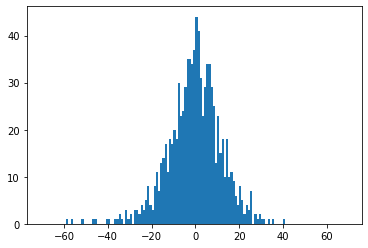

In [60]:
temp = round(df_final["pct_change"] , 4)*100
plt.hist(temp , bins = range(-70,70,1))

In [55]:
temp.describe()

count    920.000000
mean      -0.396022
std       12.175119
min      -58.170000
25%       -7.207500
50%        0.200000
75%        6.917500
max       40.440000
Name: pct_change, dtype: float64

In [56]:
threshold = temp.describe()["50%"]
threshold

0.2

In [62]:
#f = lambda x : "Increase" if x > threshold  else ("Decrease" if x < -threshold else "No change")
g = lambda x : "Increase" if x > threshold  else "Decrease"

#Choose  f or g to use
f = g

df_final["trend"] = [ f(x) for x in df_final["pct_change"]]
df_final[15:30]

,DDATE,price_per_mile,total_fluc_50,total_fluc_70,total_fluc_120,avg_price,pct_change,trend
15,2018-02-16,0.233281,-0.362502,-0.362502,-0.362502,0.228068,-0.022860,Decrease
16,2018-02-17,0.209639,0.534895,0.534895,0.534895,0.225087,0.068629,Decrease
17,2018-02-18,0.224684,0.112192,0.112192,0.112192,0.224616,-0.000302,Decrease
18,2018-02-19,0.211716,0.500294,0.500294,0.500294,0.224004,0.054857,Decrease
19,2018-02-20,0.141462,-0.413359,-0.413359,-0.413359,0.217999,0.351088,Increase
20,2018-02-21,0.193646,-0.563715,-0.563715,-0.563715,0.215427,0.101105,Decrease
21,2018-02-22,0.225846,-1.370097,-1.150081,-1.150081,0.217838,-0.036762,Decrease
22,2018-02-23,0.205054,2.726713,3.882822,3.882822,0.205666,0.002977,Decrease
23,2018-02-24,0.274280,-1.292630,-0.771571,-0.771571,0.210791,-0.301193,Decrease
24,2018-02-25,0.253926,-0.858647,-1.348256,-1.348256,0.216327,-0.173806,Decrease


In [66]:
df_final.to_csv("new_airfare_features.csv")

**************

## just ignore code below :P 

Didnot want to type all these again hence parked it here to copy paste :P

In [51]:
#grouped_data["TBF30-60"] = np.where(grouped_data["TIME_BEFORE_FLIGHT"] <=60, grouped_data["TIME_BEFORE_FLIGHT"] ,0 )
#grouped_data["TBF61-90"] = np.where((grouped_data["TIME_BEFORE_FLIGHT"] >60) & (grouped_data["TIME_BEFORE_FLIGHT"] <=90), grouped_data["TIME_BEFORE_FLIGHT"] ,0 )
#grouped_data["TBF91+"] = np.where(grouped_data["TIME_BEFORE_FLIGHT"] >90 , grouped_data["TIME_BEFORE_FLIGHT"] ,0 )

#new_group_data["TBF60"] = np.where(grouped_data["TIME_BEFORE_FLIGHT"] <=60, 1 ,0 ) #short fluc
#new_group_data["TBF90"] = np.where(grouped_data["TIME_BEFORE_FLIGHT"] <=90, 1 ,0 ) #medium fluc
#new_group_data["TBF91+"] = np.where(grouped_data["TIME_BEFORE_FLIGHT"]<=120, 1 ,0 ) #long fluc

#new_group_data.tail()